## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline 

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [2]:
# Use [Pandas] to import data | banknotes.csv
# Put your code here 

bank = pd.read_csv('banknotes.csv')
label = bank.conterfeit

bank.head(n = 17)

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8
5,0,215.7,130.8,130.5,9.0,10.1,141.4
6,0,215.5,129.5,129.7,7.9,9.6,141.6
7,0,214.5,129.6,129.2,7.2,10.7,141.7
8,0,214.9,129.4,129.7,8.2,11.0,141.9
9,0,215.2,130.4,130.3,9.2,10.0,140.7


In [3]:
# Use [Numpy function] to stack the following columns
# The 5-th column "Bottom" as X, the 6-th column "Top" as Y
# Put your code here

data_xy = np.column_stack((bank['Bottom'],bank['Top']))

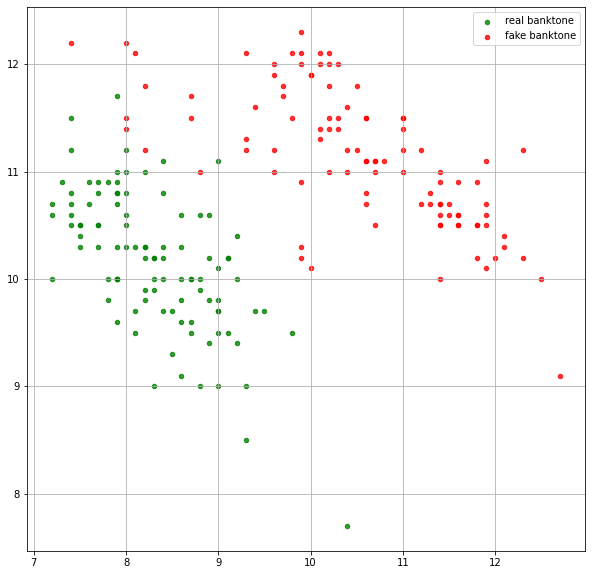

In [4]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(label == 0)
index_1 = np.where(label == 1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
# Put your code here
x0,x1,y0,y1 = [],[],[],[]
for i in range(len(index_0[0])):
    x0.append(data_xy[index_0[0][i]][0])
for i in range(len(index_0[0])):
    y0.append(data_xy[index_0[0][i]][1])
for i in range(len(index_1[0])):
    x1.append(data_xy[index_1[0][i]][0])
for i in range(len(index_1[0])):
    y1.append(data_xy[index_1[0][i]][1])

plt.figure(figsize = (10, 10))
plt.scatter(x0,y0,s=20, alpha=0.8,c = 'green',label = 'real banktone')
plt.scatter(x1,y1,s=20, alpha=0.8,c = 'red',label = 'fake banktone')
plt.legend()
plt.grid()
plt.show()

In [5]:
# Use [Numpy function] to calculate the squared distance matrix between each points
# Put your code here
dist_sq = np.array([])
for i in range(len(data_xy)):
    for j in range(len(data_xy)):
        dist_sq = np.append((dist_sq),(np.array([np.linalg.norm(data_xy[i]-data_xy[j])])))
dist_sq = dist_sq.reshape(200,-1)
dist_sq = np.square(dist_sq)

In [6]:
dist_sq

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [7]:
def nearest_partition(dist_sq, K):
    
    # Use [Numpy function] to return the "K Nearest Neighbor"
    # Put your code here
    argdist_sq = np.argsort(dist_sq, axis=1) 
    kpoint = argdist_sq[:,0:K+1]
    return kpoint

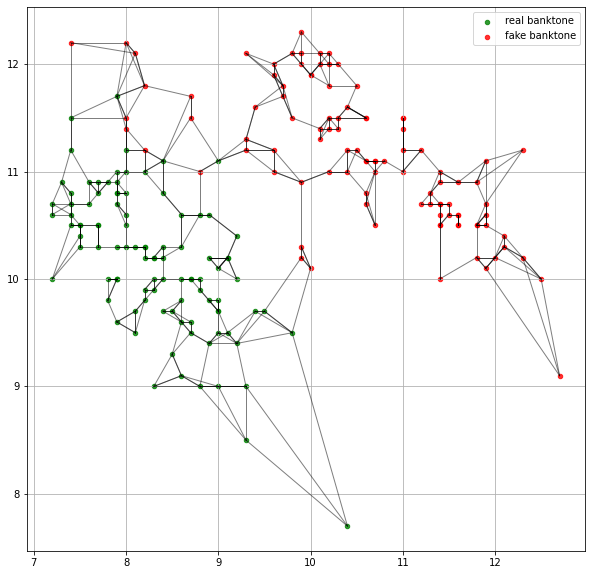

In [8]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(label == 0)
index_1 = np.where(label == 1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
# Put your code here
x0,x1,y0,y1 = [],[],[],[]
for i in range(len(index_0[0])):
    x0.append(data_xy[index_0[0][i]][0])
for i in range(len(index_0[0])):
    y0.append(data_xy[index_0[0][i]][1])
for i in range(len(index_1[0])):
    x1.append(data_xy[index_1[0][i]][0])
for i in range(len(index_1[0])):
    y1.append(data_xy[index_1[0][i]][1])

plt.figure(figsize = (10, 10))
plt.scatter(x0,y0,s=20, alpha=0.8,c = 'green',label = 'real banktone')
plt.scatter(x1,y1,s=20, alpha=0.8,c = 'red',label = 'fake banktone')
plt.legend()
plt.grid()
        
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put your code here

K = 3
kpoint = nearest_partition(dist_sq, K)
for i in range(len(data_xy)):
    for j in range(K+1):
        plt.plot(*zip(data_xy[i],data_xy[kpoint[i][j]]),color='black', linewidth=1, alpha=0.5)
plt.show()

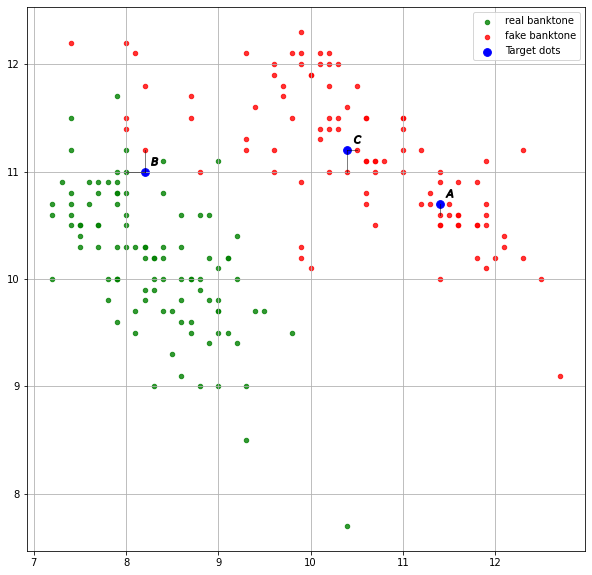

In [9]:
# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines

random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
text = ['A', 'B', 'C']
text = ["$A$","$B$","$C$"]
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(label == 0)
index_1 = np.where(label == 1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red | Target → color = blue
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here
x0,x1,y0,y1 = [],[],[],[]
x2 = []
y2 = []
for i in range(len(target)):
    x2.append(data_xy[target[i]][0])
    y2.append(data_xy[target[i]][1])
for i in range(len(index_0[0])):
    x0.append(data_xy[index_0[0][i]][0])
for i in range(len(index_0[0])):
    y0.append(data_xy[index_0[0][i]][1])
for i in range(len(index_1[0])):
    x1.append(data_xy[index_1[0][i]][0])
for i in range(len(index_1[0])):
    y1.append(data_xy[index_1[0][i]][1])

plt.figure(figsize = (10, 10))
plt.scatter(x0,y0,s=20, alpha=0.8,c = 'green',label = 'real banktone')
plt.scatter(x1,y1,s=20, alpha=0.8,c = 'red',label = 'fake banktone')
plt.scatter(x2,y2,s=60,c ='blue',label = 'Target dots') # Target dots
plt.legend()
plt.grid()



# Draw lines from the selected three point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put text A, B, C on each dots (location: Right + 0.1、 Up + 0.1)
# Put your code here


K = 3
nearest_partition(dist_sq, K)
for i in range(len(target)):
    for j in range(K):
        plt.plot(*zip(data_xy[target[i]],data_xy[nearest_partition(dist_sq, K)[target][i][j]]),color='black', linewidth=1, alpha=0.5)
for i in range(len(target)):
    plt.scatter(x2[i]+0.1,y2[i]+0.1,color = "black",marker=text[i], linewidth=1, alpha=1,s = 60)
plt.show()

### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### Your Answer :
A跟C點是fake banktone，B點則是real banktone，因為AC當中3/3都是連到其他fake banktone，而B點2/3連到其他real banktone
(AC的三個Neighbor三個都是fake banktone ；B的三個Neighbor有兩個是real banktone，所以把他們跟大部分的real banktone歸類在同一類型)

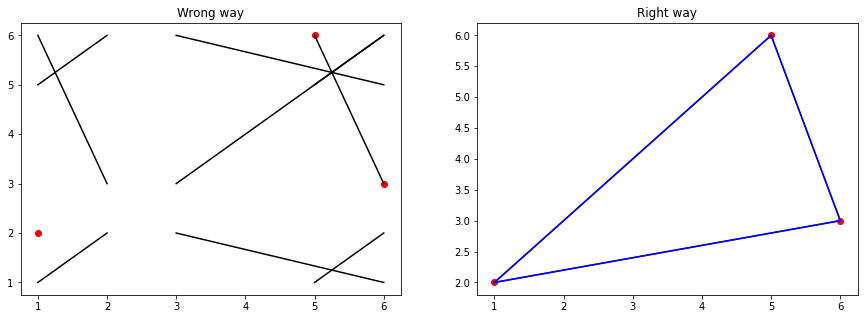

In [10]:
# Hint: How to drow a line between two dots

dots = np.array([[1, 2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')